                                       Basic Movie Recommendation System Project

The Movie Recommendation System project is a type of ML Project which helps is recommending the movies similar to the movie which we have entered as input in the input box. 

This project is basically based on the content based filtering which basically filters the movies based on their similarities and then we get the recommendation of the moviees.  

The project works on the principle of Cosine Similarity, which impported from the scikit-learn library. 

The cosine similarity bassicalyy works on the system of  calculating the angles in between the vectors. The 2 vectors which have smaller angle difference, means that they 2 are somewhat similar. 

In [1]:
# importing the libraries in the project 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import difflib 

In [2]:
# Now,  we will be importing the dataset here for the evaluation as:  
data = pd.read_csv("movies.csv") 
data 

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,4798,220000,Action Crime Thriller,NaN,9367,united states\u2013mexico barrier legs arms pa...,es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,...,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,Carlos Gallardo Jaime de Hoyos Peter Marquardt...,"[{'name': 'Robert Rodriguez', 'gender': 0, 'de...",Robert Rodriguez
4799,4799,9000,Comedy Romance,NaN,72766,NaN,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,...,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,Edward Burns Kerry Bish\u00e9 Marsha Dietlein ...,"[{'name': 'Edward Burns', 'gender': 2, 'depart...",Edward Burns
4800,4800,0,Comedy Drama Romance TV Movie,http://www.hallmarkchannel.com/signedsealeddel...,231617,date love at first sight narration investigati...,en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,...,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6,Eric Mabius Kristin Booth Crystal Lowe Geoff G...,"[{'name': 'Carla Hetland', 'gender': 0, 'depar...",Scott Smith
4801,4801,0,NaN,http://shanghaicalling.com/,126186,NaN,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,...,98.0,"[{""iso_639_1"": ""en

Now, we willl be carrying out the analysis on the data for the further preprocessing and evaluation as: 

In [3]:
data.shape 

(4803, 24)

In [4]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

In [5]:
data.describe() 

,index,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4803.000000,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2401.000000,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,1386.651002,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,1200.500000,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,2401.000000,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,3601.500000,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,4802.000000,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [6]:
data.isnull().sum() 
# Here, as we can see athat there are some empty values in the whole features, which will have to be treated before the 
# further preprocessing 

index                      0
budget                     0
genres                    28
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                      43
crew                       0
director                  30
dtype: int64

Now, we will be selecting the features, so that based on them, we can apply the Ml algorithm on it. 

The features we are selecting include:  
1. Genres 
2. Keywords  
3. Overview 
4. Tagline 
5. Cast 
6. Director   

In [7]:
features = ['genres', 'keywords', 'overview', 'tagline', 'cast', 'director'] 
print(features) 

['genres', 'keywords', 'overview', 'tagline', 'cast', 'director']


In [8]:
# First, we will be filling the missing features using fillna, so thar machine learning can be aplied to it.  

for feature in features: 
    data[feature] = data[feature].fillna('') 

data 

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,4798,220000,Action Crime Thriller,NaN,9367,united states\u2013mexico barrier legs arms pa...,es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,...,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,Carlos Gallardo Jaime de Hoyos Peter Marquardt...,"[{'name': 'Robert Rodriguez', 'gender': 0, 'de...",Robert Rodriguez
4799,4799,9000,Comedy Romance,NaN,72766,,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,...,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,Edward Burns Kerry Bish\u00e9 Marsha Dietlein ...,"[{'name': 'Edward Burns', 'gender': 2, 'depart...",Edward Burns
4800,4800,0,Comedy Drama Romance TV Movie,http://www.hallmarkchannel.com/signedsealeddel...,231617,date love at first sight narration investigati...,en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,...,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,,"Signed, Sealed, Delivered",7.0,6,Eric Mabius Kristin Booth Crystal Lowe Geoff G...,"[{'name': 'Carla Hetland', 'gender': 0, 'depar...",Scott Smith
4801,4801,0,,http://shanghaicalling.com/,126186,,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,...,98.0,"[{""iso_639_1"": ""en"", ""name""

Here, as wwe can see that the data pre processing has been done and the missing values have been filled. 

In [9]:
# now, we will be combinig the features, to apply the ml algorithms on them as: 

data['combined_features'] = (
    data['genres'] + " " + 
    data['keywords'] + " " + 
    data['overview'] + " " + 
    data['tagline'] + " " + 
    data['cast'] + " " + 
    data['director'] 
)


In [10]:
data['combined_features']  

# Here as we can see that the ccombieed features have been seperated and printed. 

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4798    Action Crime Thriller united states\u2013mexic...
4799    Comedy Romance  A newlywed couple's honeymoon ...
4800    Comedy Drama Romance TV Movie date love at fir...
4801      When ambitious New York attorney Sam is sent...
4802    Documentary obsession camcorder crush dream gi...
Name: combined_features, Length: 4803, dtype: object

Now, comes the part of converting the text into the TFIDF Matrix into the Tfidf vectorizer. 

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer 

tfidf = TfidfVectorizer(max_features = 3000, stop_words = 'english') 
tfidf 

,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None
,analyzer,'word'
,stop_words,'english'
,token_pattern,'(?u)\\b\\w\\w+\\b'
,ngram_range,"(1, ...)"


In [12]:
tfidf_matrix = tfidf.fit_transform(data['combined_features']) 
tfidf_matrix  

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 151462 stored elements and shape (4803, 3000)>

In [13]:
print(tfidf_matrix.shape)

(4803, 3000)


In [14]:
# Now, we will be applying the cosine similarity on the tfidf matrix, so that the further pre processing has to be applied.  

from sklearn.metrics.pairwise import cosine_similarity  

cosine_sim = cosine_similarity(tfidf_matrix) 
print(cosine_sim)   

[[1.         0.03851105 0.03197382 ... 0.00799839 0.03873852 0.        ]
 [0.03851105 1.         0.01879985 ... 0.03265069 0.01780171 0.        ]
 [0.03197382 0.01879985 1.         ... 0.01720322 0.0807831  0.        ]
 ...
 [0.00799839 0.03265069 0.01720322 ... 1.         0.03328137 0.04592735]
 [0.03873852 0.01780171 0.0807831  ... 0.03328137 1.         0.01985935]
 [0.         0.         0.         ... 0.04592735 0.01985935 1.        ]]


In [15]:
print(np.round(cosine_sim[:10, :10], 2))  

# Here the data looks a btt clean and readable 

[[1.   0.04 0.03 0.03 0.1  0.08 0.01 0.07 0.02 0.04]
 [0.04 1.   0.02 0.   0.08 0.06 0.01 0.06 0.07 0.04]
 [0.03 0.02 1.   0.04 0.03 0.03 0.01 0.09 0.06 0.02]
 [0.03 0.   0.04 1.   0.02 0.03 0.03 0.01 0.07 0.09]
 [0.1  0.08 0.03 0.02 1.   0.05 0.02 0.08 0.01 0.04]
 [0.08 0.06 0.03 0.03 0.05 1.   0.02 0.03 0.02 0.03]
 [0.01 0.01 0.01 0.03 0.02 0.02 1.   0.02 0.04 0.04]
 [0.07 0.06 0.09 0.01 0.08 0.03 0.02 1.   0.04 0.12]
 [0.02 0.07 0.06 0.07 0.01 0.02 0.04 0.04 1.   0.05]
 [0.04 0.04 0.02 0.09 0.04 0.03 0.04 0.12 0.05 1.  ]]


Now, we use the difflib library for the fuzzy matching which takes place so as to prevent errors on the mismatching of the names. 

In [16]:
movie_titles = data['title'].tolist() 

def find_closest_movie(name): 
    matches = difflib.get_close_matches(name, movie_titles) 

    if matches: 
        return matches[0] 

    else: 
        return None 

Getting the movie names from the user 

In [17]:
movie_name = input("Enter your favourite movie name: ") 

print(f"Enter your favourite movie name: {movie_name}") 

Enter your favourite movie name: Iron Man


In [18]:
# Creating a list of all movie names in the whole dataset as:  

movie_titles = data['title'].tolist() 
print(movie_titles) 

['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre', 'The Dark Knight Rises', 'John Carter', 'Spider-Man 3', 'Tangled', 'Avengers: Age of Ultron', 'Harry Potter and the Half-Blood Prince', 'Batman v Superman: Dawn of Justice', 'Superman Returns', 'Quantum of Solace', "Pirates of the Caribbean: Dead Man's Chest", 'The Lone Ranger', 'Man of Steel', 'The Chronicles of Narnia: Prince Caspian', 'The Avengers', 'Pirates of the Caribbean: On Stranger Tides', 'Men in Black 3', 'The Hobbit: The Battle of the Five Armies', 'The Amazing Spider-Man', 'Robin Hood', 'The Hobbit: The Desolation of Smaug', 'The Golden Compass', 'King Kong', 'Titanic', 'Captain America: Civil War', 'Battleship', 'Jurassic World', 'Skyfall', 'Spider-Man 2', 'Iron Man 3', 'Alice in Wonderland', 'X-Men: The Last Stand', 'Monsters University', 'Transformers: Revenge of the Fallen', 'Transformers: Age of Extinction', 'Oz: The Great and Powerful', 'The Amazing Spider-Man 2', 'TRON: Legacy', 'Cars 2', 'Green Lant

In [19]:
# Now, we have to get the close match of the movies 

find_close_match =  difflib.get_close_matches(movie_name, movie_titles) 

find_close_match 

# Here as we can see that we get close matches of the movie 

['Iron Man', 'Iron Man 3', 'Iron Man 2']

In [20]:
for movies in find_close_match: 
    print(movies) 

Iron Man
Iron Man 3
Iron Man 2


In [21]:
close_match = find_close_match[0] 
print(close_match) 

Iron Man


In [22]:
# Finding the index of the movie with title.  

movie_index = data[data.title == close_match]['index'].values[0]  
print(movie_index) 


68


In [23]:
# Now, we wil be printing the similarity score of the similar movies 

similarity_score = list(enumerate(cosine_sim[movie_index]))  

print(similarity_score) 

[(0, np.float64(0.07351039714831145)), (1, np.float64(0.04909032544971496)), (2, np.float64(0.012989287728464003)), (3, np.float64(0.004676825448308066)), (4, np.float64(0.029508152357070765)), (5, np.float64(0.012643762542134524)), (6, np.float64(0.030899351595491665)), (7, np.float64(0.2942759539059185)), (8, np.float64(0.008808975927547343)), (9, np.float64(0.06792590601874554)), (10, np.float64(0.06676612544438215)), (11, np.float64(0.011957566357950852)), (12, np.float64(0.013628954571228247)), (13, np.float64(0.009981424242143124)), (14, np.float64(0.0951227085406185)), (15, np.float64(0.02226313715301721)), (16, np.float64(0.20898244899669866)), (17, np.float64(0.017419435061286136)), (18, np.float64(0.017109614785365025)), (19, np.float64(0.06952159237720484)), (20, np.float64(0.05662876645801711)), (21, np.float64(0.037585532442678496)), (22, np.float64(0.00881117005954404)), (23, np.float64(0.01665006919124469)), (24, np.float64(0.01235591304524484)), (25, np.float64(0.0)), (

In [24]:
len(similarity_score) 

4803

In [25]:
sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse  = True) 
print(sorted_similar_movies) 

[(68, np.float64(1.0)), (79, np.float64(0.3442608930979072)), (31, np.float64(0.31644467563269113)), (7, np.float64(0.2942759539059185)), (16, np.float64(0.20898244899669866)), (182, np.float64(0.20618212827740662)), (26, np.float64(0.19776908554158543)), (511, np.float64(0.18019130443061177)), (4401, np.float64(0.15192842830189154)), (1740, np.float64(0.15060591762590014)), (3466, np.float64(0.14648989999736753)), (64, np.float64(0.14615618293882923)), (4325, np.float64(0.14476606467259617)), (4033, np.float64(0.14252843377569996)), (174, np.float64(0.14134844985199338)), (203, np.float64(0.1398598355008151)), (318, np.float64(0.13880727559244596)), (3133, np.float64(0.13821080156634866)), (94, np.float64(0.13658925138025055)), (1135, np.float64(0.13622715256639467)), (2875, np.float64(0.13379648949657721)), (101, np.float64(0.13307980222451063)), (783, np.float64(0.13254870739625582)), (2487, np.float64(0.13191014309307886)), (33, np.float64(0.12824387108573482)), (1177, np.float64(0

Now, we will be finding for the similar movies:  

In [26]:
print("Movies suggested for you:\n") 

i = 1 
for movie in sorted_similar_movies: 
    index  =   movie[0] 
    title_from_index = data[data.index==index]['title'].values[0] 
    if (i<30): 
        print(i,'.',title_from_index) 
        i+=1 


Movies suggested for you:

1 . Iron Man
2 . Iron Man 2
3 . Iron Man 3
4 . Avengers: Age of Ultron
5 . The Avengers
6 . Ant-Man
7 . Captain America: Civil War
8 . X-Men
9 . The Helix... Loaded
10 . Kick-Ass 2
11 . Sliding Doors
12 . X-Men: Apocalypse
13 . Beyond the Black Rainbow
14 . Super
15 . The Incredible Hulk
16 . X2
17 . Surf's Up
18 . The Devil's Tomb
19 . Guardians of the Galaxy
20 . Lord of War
21 . Two Lovers
22 . X-Men: First Class
23 . Mortdecai
24 . Duets
25 . X-Men: The Last Stand
26 . Sin City
27 . Thor: The Dark World
28 . Special
29 . Sanctum


In [27]:
movie_name = input("Enter thefavourite movie name: ") 
print(f"Enter your movie name: {movie_name}") 

movie_titles = data['title'].tolist() 

find_close_match = difflib.get_close_matches(movie_name, movie_titles) 

close_match =  find_close_match[0] 

movie_index = data[data.title == close_match]['index'].values[0] 

similarity_score = list(enumerate(cosine_sim[movie_index])) 

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True) 

print("Movies suggested for you:\n") 

i = 1 

for movie in sorted_similar_movies: 
    index = movie[0] 
    title_from_index = data[data.index == index]['title'].values[0] 
    if i<30: 
        print(i,'.',title_from_index) 
        i+=1 

Enter your movie name: Gravity
Movies suggested for you:

1 . Gravity
2 . Moonraker
3 . Space Dogs
4 . Lost in Space
5 . Space Pirate Captain Harlock
6 . Space Chimps
7 . Cargo
8 . Deep Impact
9 . Lifeforce
10 . The Right Stuff
11 . Silent Running
12 . Treasure Planet
13 . Alien
14 . Space Cowboys
15 . Lockout
16 . Galaxina
17 . Capricorn One
18 . Spaceballs
19 . Zathura: A Space Adventure
20 . Avatar
21 . Mission to Mars
22 . The Astronaut's Wife
23 . Guardians of the Galaxy
24 . Event Horizon
25 . Star Trek Beyond
26 . Muppets from Space
27 . Jason X
28 . Elysium
29 . Planet of the Apes


In [28]:
# conversion into function  

def recommend_movies(movie_name, data, cosine_sim): 
    movie_titles = data['title'].tolist() 

    find_close_match = difflib.get_close_matches(movie_name, movie_titles) 

    close_match =  find_close_match[0] 

    movie_index = data[data.title == close_match]['index'].values[0] 

    similarity_score = list(enumerate(cosine_sim[movie_index])) 

    sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True) 

    print("Movies suggested for you:\n") 

    i = 1 

    for movie in sorted_similar_movies: 
     index = movie[0] 
     title_from_index = data[data.index == index]['title'].values[0] 
     if i<30: 
        print(i,'.',title_from_index) 
        i+=1 


In [29]:
def main(): 
    movie_name =  input("Enter the favourite movie name: ") 
    print(f"Enter the movie name:{movie_name}") 

    recommend_movies(movie_name, data, cosine_sim)

In [30]:
main()

Enter the movie name:Avatar
Movies suggested for you:

1 . Avatar
2 . Moonraker
3 . Aliens
4 . Alien
5 . Lifeforce
6 . Guardians of the Galaxy
7 . Lost in Space
8 . Star Trek Beyond
9 . Gravity
10 . Lockout
11 . Space Pirate Captain Harlock
12 . Space Chimps
13 . Treasure Planet
14 . Starship Troopers
15 . Trekkies
16 . Galaxy Quest
17 . Space Dogs
18 . Silent Running
19 . Apollo 18
20 . The Book of Life
21 . Cargo
22 . Star Trek Into Darkness
23 . Men in Black II
24 . Deep Impact
25 . Jason X
26 . Machete Kills
27 . Star Trek
28 . The Right Stuff
29 . Gattaca


In [31]:
main() 

Enter the movie name:Interestellar
Movies suggested for you:

1 . Interstellar
2 . Space Cowboys
3 . The Matrix
4 . Star Trek: The Motion Picture
5 . Contact
6 . Armageddon
7 . The Matrix Revolutions
8 . Stealth
9 . Ex Machina
10 . The Terminator
11 . Moonraker
12 . Lucy
13 . Lost in Space
14 . Space Pirate Captain Harlock
15 . Gattaca
16 . The Matrix Reloaded
17 . Deep Impact
18 . Man of Steel
19 . Hollow Man
20 . Planet of the Apes
21 . Meteor
22 . Titan A.E.
23 . Wing Commander
24 . About Time
25 . Cargo
26 . Dear Frankie
27 . Her
28 . Big Fish
29 . Midnight Special


In [32]:
main()  

Enter the movie name:Harry Potter
Movies suggested for you:

1 . Party Monster
2 . The Players Club
3 . Neighbors 2: Sorority Rising
4 . Home Alone 2: Lost in New York
5 . This Is the End
6 . Bizarre
7 . Choke
8 . Shortbus
9 . Crocodile Dundee II
10 . Exotica
11 . The Jerky Boys
12 . Crocodile Dundee
13 . Idlewild
14 . The Hotel New Hampshire
15 . How to Be Single
16 . Shattered Glass
17 . Stitches
18 . The Poker House
19 . Barry Munday
20 . Counting
21 . Center Stage
22 . Me and Orson Welles
23 . R100
24 . Austin Powers in Goldmember
25 . Niagara
26 . Basquiat
27 . London
28 . Deuces Wild
29 . Logan's Run


# Visualizattion Plots 

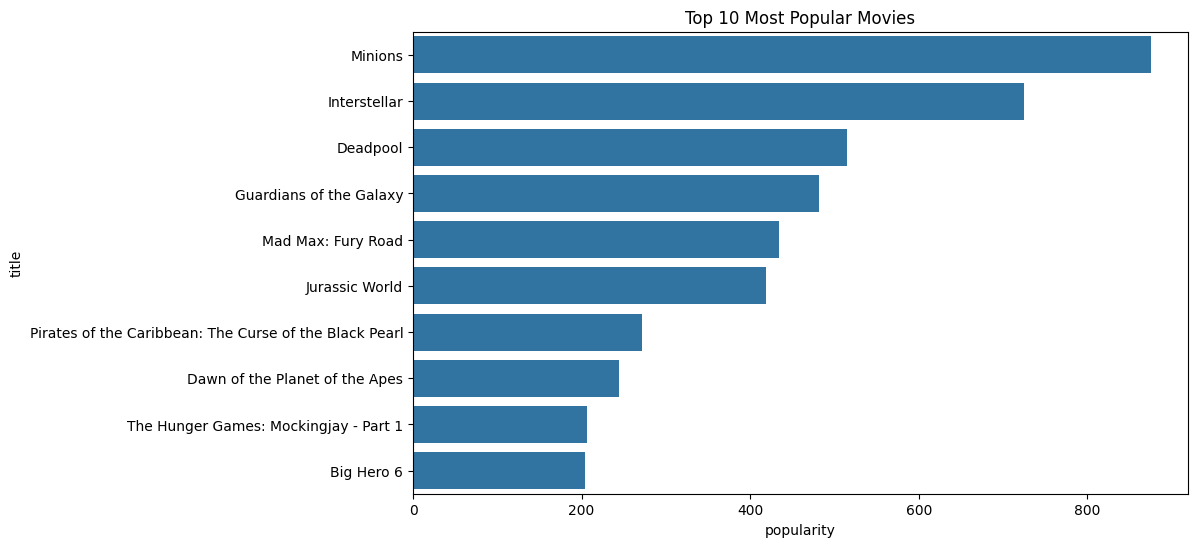

In [33]:
# Top 10n popular Movies 

top_movies =  data.sort_values(by = 'popularity', ascending = False).head(10) 

plt.figure(figsize = (10,6)) 

sns.barplot(x = 'popularity', y = 'title', data = top_movies) 

plt.title("Top 10 Most Popular Movies") 
plt.show() 

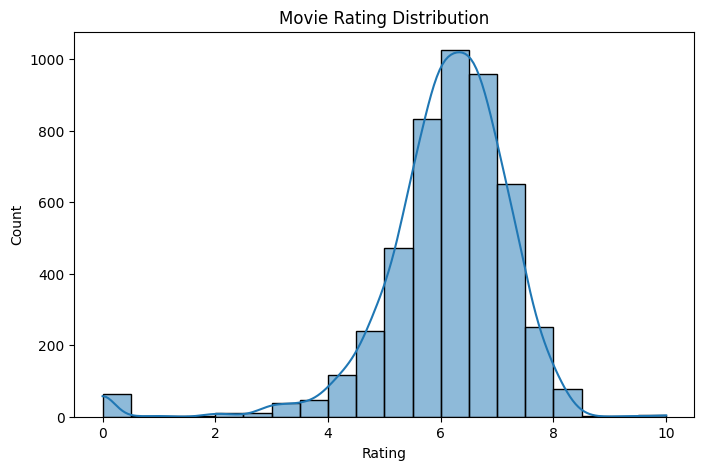

In [34]:
# Rating Distribution Graph 
plt.figure(figsize = (8,5)) 
sns.histplot(data['vote_average'], bins = 20, kde = True) 

plt.title("Movie Rating Distribution") 
plt.xlabel("Rating") 
plt.show() 

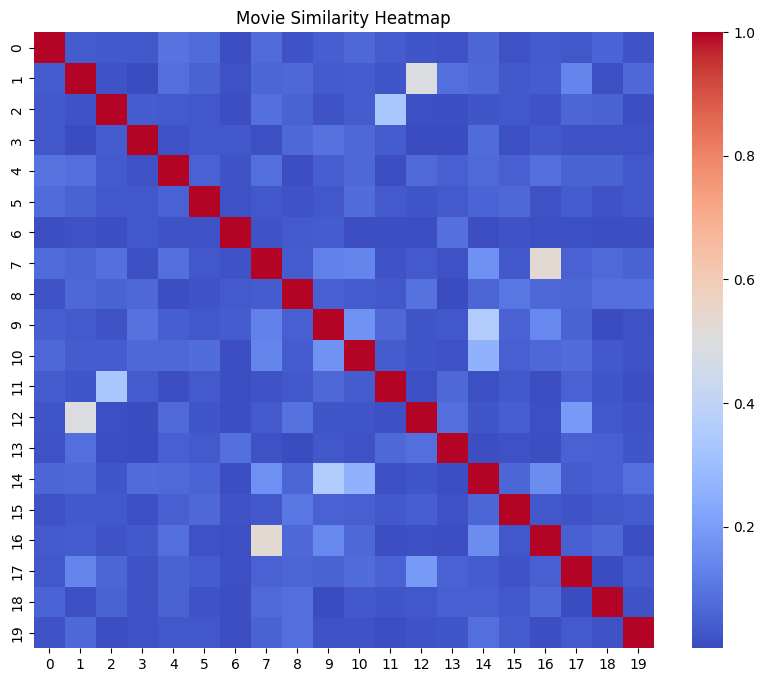

In [35]:
# Plotting thecorrelation heatmap 

sample = cosine_sim[:20, :20] 

plt.figure(figsize = (10,8)) 

sns.heatmap(sample, cmap = 'coolwarm') 

plt.title("Movie Similarity Heatmap") 

plt.show()

The cosine heatmap basically shows the pairwise similarity between the all movies, which movies are mmost similar and the least similar. 

The patterns oor the clusters of similar movies. 